In [ ]:
from keras.datasets import mnist
import numpy as np
import keras
from keras import layers
from keras.callbacks import TensorBoard
import librosa
import librosa.display
import os
import glob
import scipy
import matplotlib.pyplot as plt
import soundfile as sf
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tqdm import tqdm


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
# print(tf.__version__)
# print(keras.__version__)

Mounted at /content/gdrive


In [ ]:
# dataset_file=np.load('/content/gdrive/My Drive/Project/new_enhanced_background+vox_dataset_22k_128x64.npy',allow_pickle=True)
# noisy_signal_data_split = dataset_file[()]["noisy_data"]
# clean_signal_data_split = dataset_file[()]["clean_data"]
# print(noisy_signal_data_split.shape)

# new_noise = []
# new_clean = []

# for i in range(0,23364,2):
#     new_noise.append(np.reshape(noisy_signal_data_split[i:i+2],(8192)))
#     new_clean.append(np.reshape(clean_signal_data_split[i:i+2],(8192)))

# new_noise=np.array(new_noise)
# print(new_noise.shape)
# new_clean=np.array(new_noise)
# print(new_clean.shape)
# dataset = {
#     "noisy_data":new_noise,
#     "clean_data":new_clean
# }
# np.save('/content/gdrive/My Drive/Project/new_enhanced_background+vox_dataset_22k_128x128.npy',dataset)


(11682, 8192)
(11682, 8192)


In [ ]:
samp_interv = 8064
sr=22050
dataset_file=np.load('/content/gdrive/My Drive/Project/new_fft_vox+background_urban_dataset_22k_128x128.npy',allow_pickle=True)
#dataset_file=np.load('background+dataset_file_22k_128x64.npy',allow_pickle=True)
#dataset_file=np.load('dataset_file_22k_128x64.npy',allow_pickle=True)
noisy_signal_data_split = dataset_file[()]["noisy_data"]
clean_signal_data_split = dataset_file[()]["clean_data"]
print(noisy_signal_data_split.shape)
# noisy_signal_stft_magnitude = dataset_file[()]["noisy_data"]
# clean_signal_stft_magnitude = dataset_file[()]["clean_data"]
# print(noisy_signal_stft_magnitude.shape)

# windowLength=255
# fftLength=windowLength
# overlap=round(0.25 * windowLength)
# window=scipy.signal.hamming(windowLength, sym=False)
windowLength=255
fftLength=255
hop_length=63
frame_length=8064

(22179, 8064)


In [ ]:
second_dataset=np.load('/content/gdrive/My Drive/Project/new_fft_vox_only_bgrnd_128x128.npy',allow_pickle=True)
second_noisy_signal_data_split = second_dataset[()]["noisy_data"]
second_clean_signal_data_split = second_dataset[()]["clean_data"]
print(second_noisy_signal_data_split.shape)
print(second_noisy_signal_data_split[0])
combined_noisy=np.concatenate((second_noisy_signal_data_split[:550],noisy_signal_data_split,second_noisy_signal_data_split[550:]))
combined_clean=np.concatenate((second_clean_signal_data_split[:550],clean_signal_data_split,second_clean_signal_data_split[550:]))
print(combined_noisy.shape)
print(combined_clean.shape)
dataset = {
    "noisy_data":combined_noisy,
    "clean_data":combined_clean
}
np.save('/content/gdrive/My Drive/Project/new_fft_vox+background_urban_dataset_22k_128x128.npy',dataset)

(560, 8064)
[-0.02250392 -0.02392093 -0.01507397 ...  0.00790272  0.00962704
  0.01113052]
(22179, 8064)
(22179, 8064)


In [ ]:
###############SUBTRACT#######################
noisy_signal_stft_magnitude = []
# noisy_signal_stft_unscaled_magnitude = []
# noisy_signal_stft_phase = []
clean_signal_stft_magnitude = []
# clean_signal_stft_unscaled_magnitude = []
# clean_signal_stft_phase = []

noise_stft=[]
clean_stft=[]

for i in tqdm(range(0,len(noisy_signal_data_split)),desc="Progress.."):
  noise_stft = librosa.stft(noisy_signal_data_split[i], n_fft=fftLength, hop_length=hop_length)
  noise_stft_mag ,noisy_stft_phase=librosa.magphase(noise_stft)
  # noise_stft_mag=np.abs(noise_stft)
  #noisy_signal_stft_magnitude.append(librosa.amplitude_to_db(stft_mag, ref=np.max)) #Converting to dB as the abs values are very small
  noisy_signal_stft_unscaled_magnitude=librosa.amplitude_to_db(noise_stft_mag, ref=np.max)
  noisy_signal_stft_magnitude.append((noisy_signal_stft_unscaled_magnitude+80)/80) #DB Scaling
  #noisy_signal_stft_magnitude.append(noise_stft_mag/np.max(noise_stft_mag)) #Trying scaling between[0,1]
  # noisy_signal_stft_phase.append(np.angle(noise_stft))

  clean_stft = librosa.stft(clean_signal_data_split[i], n_fft=fftLength, hop_length=hop_length)
  clean_stft_mag ,clean_stft_phase=librosa.magphase(clean_stft)
  # clean_stft_mag = noise_stft_mag - np.abs(clean_stft)
  # clean_signal_stft_magnitude.append(clean_stft_mag/np.max(clean_stft_mag))
  # clean_signal_stft_unscaled_magnitude.append(librosa.amplitude_to_db(clean_stft_mag, ref=np.max))
  clean_signal_stft_unscaled_magnitude=librosa.amplitude_to_db(clean_stft_mag, ref=np.max)
  clean_signal_stft_magnitude.append((clean_signal_stft_unscaled_magnitude+80)/80) #DB Scaling
  # clean_signal_stft_phase.append(np.angle(clean_stft))

# noisy_signal_stft_unscaled_magnitude=np.array(noisy_signal_stft_unscaled_magnitude)
# noisy_signal_stft_phase=np.array(noisy_signal_stft_phase)
# clean_signal_stft_unscaled_magnitude=np.array(clean_signal_stft_unscaled_magnitude)
# clean_signal_stft_phase=np.array(clean_signal_stft_phase)

#DB Scaling
# for i in range(0, len(noisy_signal_stft_unscaled_magnitude)):
#   noisy_signal_stft_magnitude.append((noisy_signal_stft_unscaled_magnitude[i]+80)/80)
#   clean_signal_stft_magnitude.append((clean_signal_stft_unscaled_magnitude[i]+80)/80)

noisy_signal_stft_magnitude=np.array(noisy_signal_stft_magnitude)
clean_signal_stft_magnitude=np.array(clean_signal_stft_magnitude)

print(noisy_signal_stft_magnitude.shape)
print(clean_signal_stft_magnitude.shape)
print(np.max(noisy_signal_stft_magnitude))
print(np.max(clean_signal_stft_magnitude))



Progress..: 100%|██████████| 22179/22179 [01:28<00:00, 250.57it/s]


(22179, 128, 128)
(22179, 128, 128)
1.0
1.0


In [ ]:
stft_dataset = {
    "noisy_data":noisy_signal_stft_magnitude,
    "clean_data":clean_signal_stft_magnitude
}
np.save('/content/gdrive/My Drive/Project/stft_new_fft_vox+background_urban_dataset_22k_128x128.npy',stft_dataset)


In [ ]:
# train_count = 10500 #Split is 900+108 for background
train_count = 21000
# train_count = 4800

noisy_train=noisy_signal_stft_magnitude[:train_count]
noisy_test=noisy_signal_stft_magnitude[train_count:]
clean_train=clean_signal_stft_magnitude[:train_count]
clean_test=clean_signal_stft_magnitude[train_count:]
print(noisy_train.shape)
print(noisy_test.shape)

(21000, 128, 128)
(1179, 128, 128)


In [ ]:
noisy_train = np.reshape(noisy_train, (noisy_train.shape[0], noisy_train.shape[1], noisy_train.shape[2], 1))
noisy_test = np.reshape(noisy_test, (noisy_test.shape[0], noisy_test.shape[1], noisy_test.shape[2], 1))
clean_train = np.reshape(clean_train, (clean_train.shape[0], clean_train.shape[1], clean_train.shape[2], 1))
clean_test = np.reshape(clean_test, (clean_test.shape[0], clean_test.shape[1], clean_test.shape[2], 1))
print(noisy_train.shape)
print(clean_train.shape)
print(noisy_test.shape)
print(clean_test.shape)
#Saving RAM
noisy_signal_stft_magnitude = 0
clean_signal_stft_magnitude = 0


(21000, 128, 128, 1)
(21000, 128, 128, 1)
(1179, 128, 128, 1)
(1179, 128, 128, 1)


In [ ]:
#IF issues with GPU remove tensorflow.keras.* and only keep keras.*
from keras.models import Model
from keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import tensorflow as tf

size_filter_in = 16
#normal initialization of weights
kernel_init = 'he_normal'
#To apply leaky relu after the conv layer 
activation_layer = None
inputs = keras.Input(shape=(128, 128, 1))
conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
conv1 = LeakyReLU()(conv1)
conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
conv1 = LeakyReLU()(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
conv2 = LeakyReLU()(conv2)
conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
conv2 = LeakyReLU()(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
conv3 = LeakyReLU()(conv3)
conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
conv3 = LeakyReLU()(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
conv4 = LeakyReLU()(conv4)
conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
conv4 = LeakyReLU()(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
conv5 = LeakyReLU()(conv5)
conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
conv5 = LeakyReLU()(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
up6 = LeakyReLU()(up6)
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
conv6 = LeakyReLU()(conv6)
conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
conv6 = LeakyReLU()(conv6)
up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
up7 = LeakyReLU()(up7)
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
conv7 = LeakyReLU()(conv7)
conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
conv7 = LeakyReLU()(conv7)
up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
up8 = LeakyReLU()(up8)
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
conv8 = LeakyReLU()(conv8)
conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)
conv8 = LeakyReLU()(conv8)

up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
up9 = LeakyReLU()(up9)
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
conv9 = LeakyReLU()(conv9)
conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
conv9 = LeakyReLU()(conv9)
conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
conv9 = LeakyReLU()(conv9)
conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

model = Model(inputs,conv10)

model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])
#model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 128, 128, 16) 0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 2320        leaky_re_lu[0][0]                
______________________________________________________________________________________________

In [ ]:
model = keras.models.load_model('/content/gdrive/My Drive/Project/New_FFT_Vox_Urban+background_128x128_30_epochs.h5')
history = model.fit(noisy_train, clean_train,
                epochs=30,
                batch_size=64,
                shuffle=True,
                validation_data=(noisy_test, clean_test),
                callbacks=[TensorBoard(log_dir='tensorflow_logs', histogram_freq=0, write_graph=False)])
model.save('/content/gdrive/My Drive/Project/New_FFT_Vox_Urban+background_128x128_60_epochs.h5')

Epoch 1/30
329/329 [==============================] - 84s 249ms/step - loss: 0.0021 - mae: 0.0382 - val_loss: 0.0034 - val_mae: 0.0482
Epoch 2/30
329/329 [==============================] - 80s 243ms/step - loss: 0.0021 - mae: 0.0382 - val_loss: 0.0033 - val_mae: 0.0468
Epoch 3/30
329/329 [==============================] - 80s 242ms/step - loss: 0.0021 - mae: 0.0380 - val_loss: 0.0043 - val_mae: 0.0590
Epoch 4/30
329/329 [==============================] - 80s 243ms/step - loss: 0.0021 - mae: 0.0381 - val_loss: 0.0039 - val_mae: 0.0513
Epoch 5/30
329/329 [==============================] - 80s 242ms/step - loss: 0.0021 - mae: 0.0376 - val_loss: 0.0040 - val_mae: 0.0505
Epoch 6/30
329/329 [==============================] - 79s 242ms/step - loss: 0.0020 - mae: 0.0376 - val_loss: 0.0056 - val_mae: 0.0632
Epoch 7/30
329/329 [==============================] - 79s 242ms/step - loss: 0.0020 - mae: 0.0375 - val_loss: 0.0040 - val_mae: 0.0509
Epoch 8/30
329/329 [==============================] - 8

In [ ]:
history.history['val_loss']

[0.0034027337096631527,
 0.0033356458880007267,
 0.004335116595029831,
 0.0038975554052740335,
 0.004003007430583239,
 0.005590244196355343,
 0.003986696247011423,
 0.0032982348930090666,
 0.0032054856419563293,
 0.004231694620102644,
 0.004802657291293144,
 0.0031078101601451635,
 0.0045282901264727116,
 0.003749716794118285,
 0.003982577472925186,
 0.005259267520159483,
 0.003918651025742292,
 0.0052988287061452866,
 0.004341708496212959,
 0.0035319931339472532,
 0.003737685503438115,
 0.0044275932013988495,
 0.005302891600877047,
 0.004293785896152258,
 0.003814313095062971,
 0.004146333783864975,
 0.003922181203961372,
 0.00403318926692009,
 0.0037414219696074724,
 0.004372118506580591]

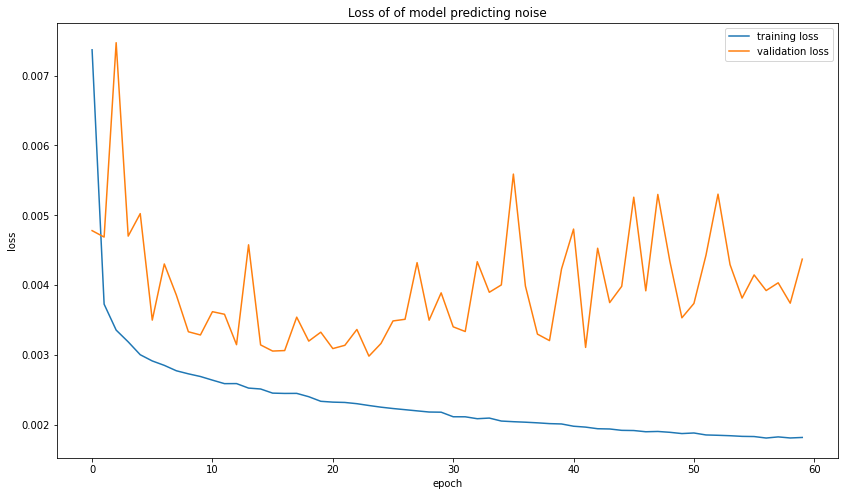

In [ ]:
loss=[0.007370450533926487,
 0.00372726540081203,
 0.003355854656547308,
 0.0031872806139290333,
 0.0030029620975255966,
 0.0029139716643840075,
 0.0028507874812930822,
 0.0027734064497053623,
 0.002729567466303706,
 0.0026911478489637375,
 0.00263916770927608,
 0.002588911447674036,
 0.0025896457955241203,
 0.0025252611376345158,
 0.0025124310050159693,
 0.0024531472008675337,
 0.0024487636983394623,
 0.0024494905956089497,
 0.0024018026888370514,
 0.0023360259365290403,
 0.0023241788148880005,
 0.0023195191752165556,
 0.0023017842322587967,
 0.0022758631967008114,
 0.0022519193589687347,
 0.0022325862664729357,
 0.0022159588988870382,
 0.0021990607492625713,
 0.0021824247669428587,
 0.002180056180804968,
 0.0021146321669220924,
 0.0021141008473932743,
 0.002086576074361801,
 0.002095848321914673,
 0.0020531732589006424,
 0.0020439194049686193,
 0.0020367223769426346,
 0.002027638489380479,
 0.0020163527224212885,
 0.002011429751291871,
 0.001979011809453368,
 0.0019663753919303417,
 0.0019431927939876914,
 0.0019396229181438684,
 0.0019201082177460194,
 0.0019173783948644996,
 0.0018999101594090462,
 0.0019040823681280017,
 0.001891976804472506,
 0.001874006586149335,
 0.0018822153797373176,
 0.0018540964229032397,
 0.001849265187047422,
 0.0018431810894981027,
 0.0018338459776714444,
 0.001831305562518537,
 0.001809956505894661,
 0.0018262587254866958,
 0.0018108104122802615,
 0.0018182089552283287]     
val_loss=[0.004780469462275505,
 0.0046883742325007915,
 0.007472319528460503,
 0.004702035803347826,
 0.005024129059165716,
 0.0034989838022738695,
 0.004303117748349905,
 0.0038573925849050283,
 0.0033320728689432144,
 0.0032860138453543186,
 0.0036194920539855957,
 0.0035826158709824085,
 0.0031469687819480896,
 0.004577459767460823,
 0.00314358901232481,
 0.0030556193087249994,
 0.003062819829210639,
 0.003541199490427971,
 0.003198235295712948,
 0.0033258586190640926,
 0.0030911823268979788,
 0.003138015978038311,
 0.003364904783666134,
 0.0029827433172613382,
 0.0031639484222978354,
 0.0034869855735450983,
 0.0035105636343359947,
 0.004321996122598648,
 0.00349773233756423,
 0.003889323677867651,
 0.0034027337096631527,
 0.0033356458880007267,
 0.004335116595029831,
 0.0038975554052740335,
 0.004003007430583239,
 0.005590244196355343,
 0.003986696247011423,
 0.0032982348930090666,
 0.0032054856419563293,
 0.004231694620102644,
 0.004802657291293144,
 0.0031078101601451635,
 0.0045282901264727116,
 0.003749716794118285,
 0.003982577472925186,
 0.005259267520159483,
 0.003918651025742292,
 0.0052988287061452866,
 0.004341708496212959,
 0.0035319931339472532,
 0.003737685503438115,
 0.0044275932013988495,
 0.005302891600877047,
 0.004293785896152258,
 0.003814313095062971,
 0.004146333783864975,
 0.003922181203961372,
 0.00403318926692009,
 0.0037414219696074724,
 0.004372118506580591]
plt.figure(figsize=(14, 8))
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.plot(loss)
plt.plot(val_loss)
plt.title('Loss graph of UNet Autoencoder model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training loss', 'validation loss'], loc='upper right')

plt.show()

In [ ]:
model=0
keras.backend.clear_session()

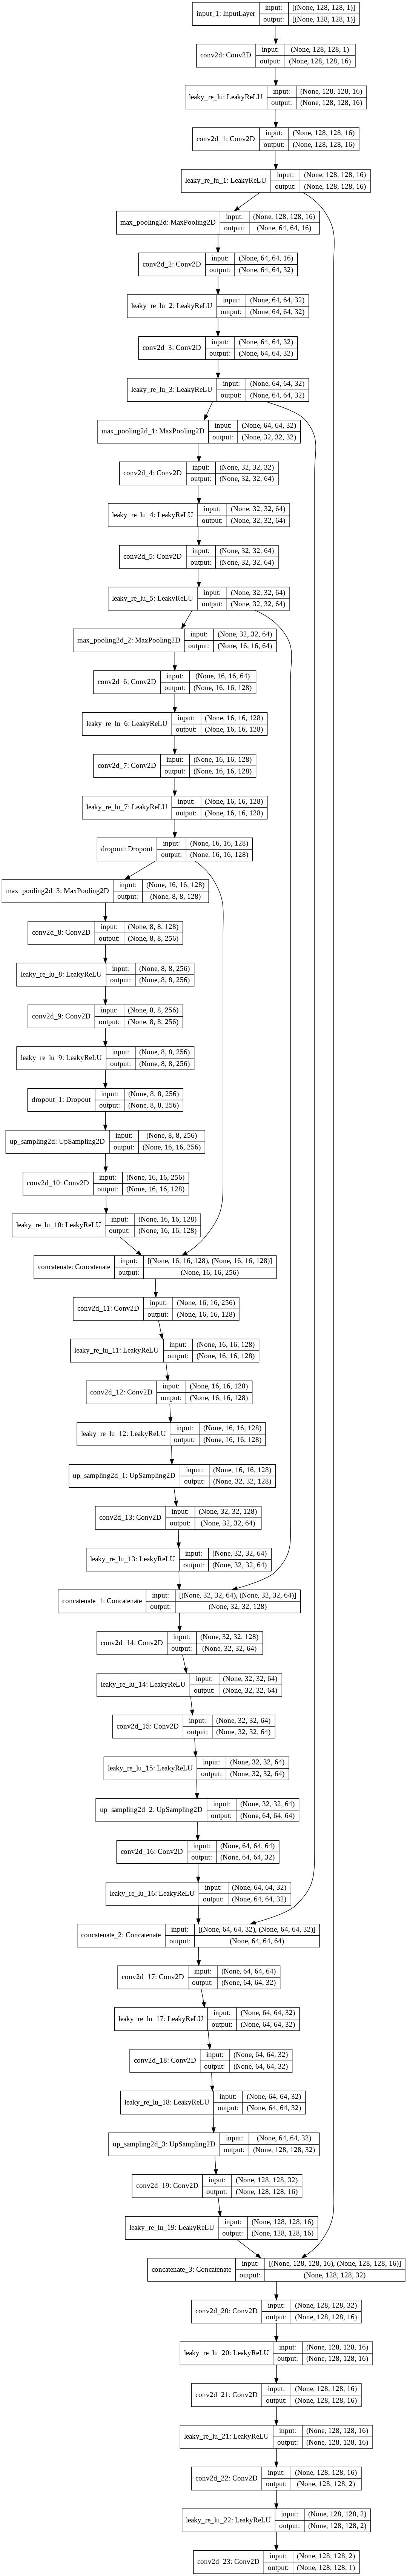

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)


In [ ]:
input_spect = keras.Input(shape=(128, 64, 1))
print("Input to encoder: " + str(input_spect.shape))
##Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_spect)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
print(x.shape)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
print(x.shape)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
print(x.shape)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)
print(x.shape)

## Decoder
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
print(x.shape)
x = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
print(x.shape)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
print(x.shape)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
print(x.shape)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
print("Output of decoder: " + str(decoded.shape))

autoencoder = keras.Model(input_spect, decoded)
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.summary()


Input to encoder: (None, 128, 64, 1)
(None, 64, 32, 32)
(None, 32, 16, 32)
(None, 16, 8, 64)
(None, 16, 8, 64)
(None, 16, 8, 64)
(None, 32, 16, 64)
(None, 64, 32, 32)
(None, 128, 64, 32)
Output of decoder: (None, 128, 64, 1)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 64, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 64, 32)       320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 16, 32)        0         
__________________________________

In [ ]:
#autoencoder=keras.models.load_model('Simple_auto_DB_norm_22k_128x64_40_epochs.h5')
autoencoder.fit(noisy_train, clean_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(noisy_test, clean_test),
                callbacks=[TensorBoard(log_dir='tensorflow_logs', histogram_freq=0, write_graph=False)])
autoencoder.save('/content/gdrive/My Drive/MTech data/Simple_auto_DB_norm_22k_128x64_10+70_epochs.h5')

Epoch 1/10
175/175 [==============================] - 45s 23ms/step - loss: 0.0433 - val_loss: 0.0524
Epoch 2/10
175/175 [==============================] - 3s 17ms/step - loss: 0.0277 - val_loss: 0.0537
Epoch 3/10
175/175 [==============================] - 3s 17ms/step - loss: 0.0266 - val_loss: 0.0529
Epoch 4/10
175/175 [==============================] - 3s 17ms/step - loss: 0.0251 - val_loss: 0.0499
Epoch 5/10
175/175 [==============================] - 3s 17ms/step - loss: 0.0242 - val_loss: 0.0496
Epoch 6/10
175/175 [==============================] - 3s 17ms/step - loss: 0.0242 - val_loss: 0.0486
Epoch 7/10
175/175 [==============================] - 3s 17ms/step - loss: 0.0240 - val_loss: 0.0484
Epoch 8/10
175/175 [==============================] - 3s 17ms/step - loss: 0.0230 - val_loss: 0.0467
Epoch 9/10
175/175 [==============================] - 3s 17ms/step - loss: 0.0223 - val_loss: 0.0443
Epoch 10/10
175/175 [==============================] - 3s 17ms/step - loss: 0.0224 - val_l

In [ ]:
autoencoder.save('/content/gdrive/My Drive/MTech data/Simple_auto_DB_norm_22k_128x64_10+70_epochs.h5')

In [ ]:
from keras.models import Model
from keras.layers import Input, Conv2D, LeakyReLU, MaxPooling2D, Dropout, concatenate, UpSampling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend
import tensorflow as tf



size_filter_in = 16
#normal initialization of weights
kernel_init = 'he_normal'
#To apply leaky relu after the conv layer 
activation_layer = 'relu'
inputs = Input(shape=(128, 128, 1))
conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(inputs)
conv1 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool1)
conv2 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool2)
conv3 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv3)
pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool3)
conv4 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv4)
drop4 = Dropout(0.5)(conv4)
pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)

conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(pool4)
conv5 = Conv2D(size_filter_in*16, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv5)
drop5 = Dropout(0.5)(conv5)

up6 = Conv2D(size_filter_in*8, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(drop5))
merge6 = concatenate([drop4,up6], axis = 3)
conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge6)
conv6 = Conv2D(size_filter_in*8, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv6)
up7 = Conv2D(size_filter_in*4, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv6))
merge7 = concatenate([conv3,up7], axis = 3)
conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge7)
conv7 = Conv2D(size_filter_in*4, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv7)
up8 = Conv2D(size_filter_in*2, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv7))
merge8 = concatenate([conv2,up8], axis = 3)
conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge8)
conv8 = Conv2D(size_filter_in*2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv8)

up9 = Conv2D(size_filter_in, 2, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(UpSampling2D(size = (2,2))(conv8))
merge9 = concatenate([conv1,up9], axis = 3)
conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(merge9)
conv9 = Conv2D(size_filter_in, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
conv9 = Conv2D(2, 3, activation = activation_layer, padding = 'same', kernel_initializer = kernel_init)(conv9)
conv10 = Conv2D(1, 1, activation = 'tanh')(conv9)

model = Model(inputs,conv10)

model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])
#model.compile(optimizer = 'adam', loss = tf.keras.losses.Huber(), metrics = ['mae'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 16)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

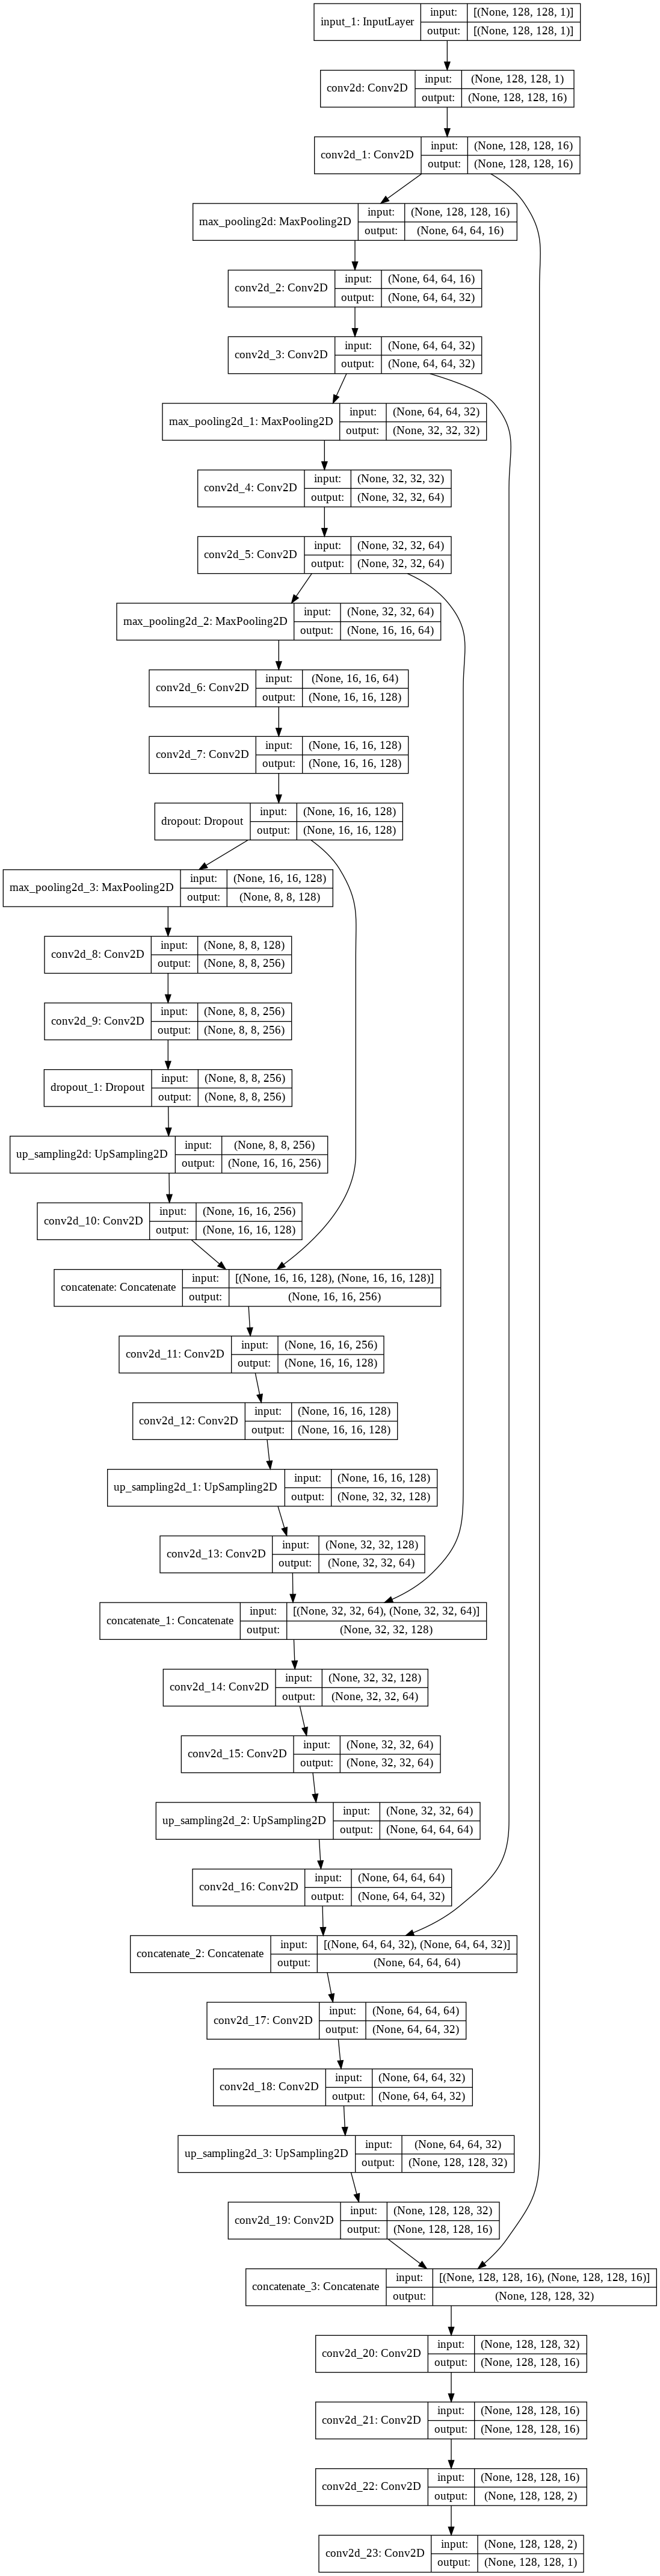

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

Epoch 1/40
75/75 [==============================] - 35s 463ms/step - loss: 0.0037 - mae: 0.0628 - val_loss: 0.0040 - val_mae: 0.0648
Epoch 2/40
75/75 [==============================] - 35s 470ms/step - loss: 0.0037 - mae: 0.0628 - val_loss: 0.0040 - val_mae: 0.0643
Epoch 3/40
75/75 [==============================] - 36s 484ms/step - loss: 0.0037 - mae: 0.0621 - val_loss: 0.0041 - val_mae: 0.0646
Epoch 4/40
75/75 [==============================] - 37s 497ms/step - loss: 0.0036 - mae: 0.0617 - val_loss: 0.0039 - val_mae: 0.0641
Epoch 5/40
75/75 [==============================] - 38s 512ms/step - loss: 0.0036 - mae: 0.0613 - val_loss: 0.0040 - val_mae: 0.0639
Epoch 6/40
75/75 [==============================] - 38s 511ms/step - loss: 0.0036 - mae: 0.0614 - val_loss: 0.0039 - val_mae: 0.0629
Epoch 7/40
75/75 [==============================] - 38s 509ms/step - loss: 0.0036 - mae: 0.0614 - val_loss: 0.0038 - val_mae: 0.0619
Epoch 8/40
75/75 [==============================] - 38s 511ms/step - 